# Import lib

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Get dataset

In [2]:
data = pd.read_csv('/content/Wine.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
y = data['Customer_Segment']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64


In [6]:
X = data[data.columns[0:13]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Scale data

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train data using PCA with Logistic Regression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [9]:
pca = PCA(n_components=2)
X = pca.fit(X)

In [10]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(142, 2)
(36, 2)


In [12]:
clf = LogisticRegression(random_state=0)
model = clf.fit(X_train_pca, y_train)

In [13]:
y_pred = model.predict(X_test_pca)
print(y_pred)

[1 3 2 1 2 1 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.9722222222222222


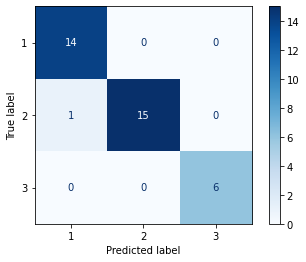

In [15]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_pca, y_test, cmap='Blues')

# Train data using PCA, Kfold cross-validation with Logistic Regression

In [8]:
pca = PCA(n_components=2)
data = pca.fit(X)
train = pca.transform(X)

In [9]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [10]:
model = LogisticRegression(random_state=0)

In [11]:
from numpy import mean
from numpy import std
scores = cross_val_score(model, train, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.961 (0.036)
